In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

In [6]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [7]:
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


In [8]:
df_lda = pd.DataFrame(X_lda, columns=["LD1", "LD2"])
df_lda['Species'] = [target_names[i] for i in y]

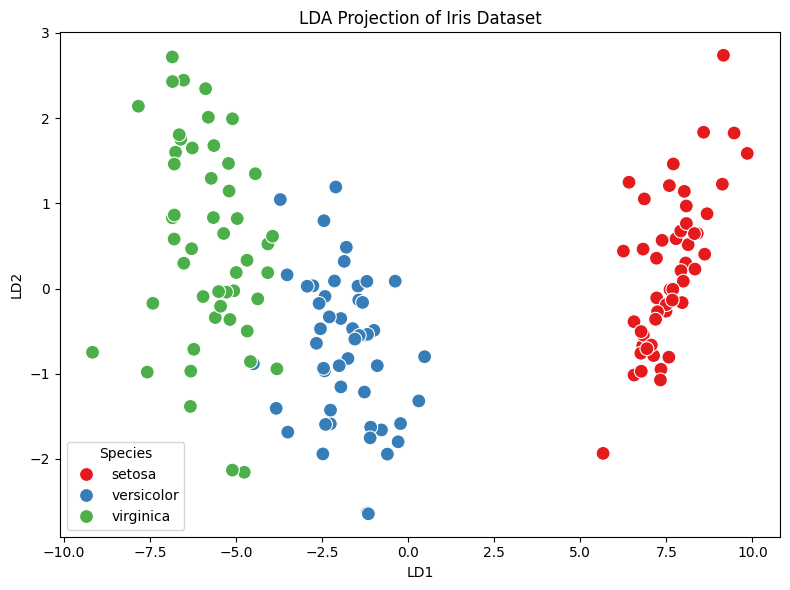

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_lda, x="LD1", y="LD2", hue="Species", palette="Set1", s=100)
plt.title("LDA Projection of Iris Dataset")
plt.tight_layout()
plt.show()